In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

# Preprocessing

- Preprocessing is a process of making file sutable for the Machine Learning Process.
- Which includes,
  - Droping the Unwanted columns,
  - Handeling NaN Values,
  - Handeling Data type of the element in the column,
  - Re-ordering of Index,
  - Lable Encoding,
  - Normalization,
  - Test and Train Split.

In [2]:
df_train = pd.read_csv("Boston_Train.csv")
df_test = pd.read_csv("Boston_Test.csv")

In [3]:
df_train

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,346,0.06162,0.0,4.39,0,0.442,5.898,52.3,8.0136,3,352,18.8,364.61,12.67,17.2
347,347,0.01870,85.0,4.15,0,0.429,6.516,27.7,8.5353,4,351,17.9,392.43,6.36,23.1
348,348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
349,349,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6


In [4]:
df_test

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,351,0.07950,60,1.69,0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,24.1
1,352,0.07244,60,1.69,0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,18.6
2,353,0.01709,90,2.02,0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1
3,354,0.04301,80,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2
4,355,0.10659,80,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,376.04,5.57,20.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,501,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
151,502,0.04527,0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
152,503,0.06076,0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
153,504,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
df_train.drop("Unnamed: 0", axis = 1, inplace = True) 
df_test.drop("Unnamed: 0", axis = 1, inplace = True) 

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     351 non-null    float64
 1   zn       351 non-null    float64
 2   indus    351 non-null    float64
 3   chas     351 non-null    int64  
 4   nox      351 non-null    float64
 5   rm       351 non-null    float64
 6   age      351 non-null    float64
 7   dis      351 non-null    float64
 8   rad      351 non-null    int64  
 9   tax      351 non-null    int64  
 10  ptratio  351 non-null    float64
 11  black    351 non-null    float64
 12  lstat    351 non-null    float64
 13  medv     351 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 38.5 KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     155 non-null    float64
 1   zn       155 non-null    int64  
 2   indus    155 non-null    float64
 3   chas     155 non-null    int64  
 4   nox      155 non-null    float64
 5   rm       155 non-null    float64
 6   age      155 non-null    float64
 7   dis      155 non-null    float64
 8   rad      155 non-null    int64  
 9   tax      155 non-null    int64  
 10  ptratio  155 non-null    float64
 11  black    155 non-null    float64
 12  lstat    155 non-null    float64
 13  medv     155 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 17.1 KB


# Exploratory Data Analysis (EDA)

It is used to look at the relation between data and choose the column with good relation with the output data.

In [8]:
df_train.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.298187,0.557235,0.129417,0.773321,-0.232369,0.487005,-0.490656,0.140519,0.406203,-0.222599,-0.522173,0.406877,-0.194024
zn,-0.298187,1.000000,-0.461280,-0.060150,-0.453540,0.327331,-0.516954,0.592013,-0.187620,-0.109459,-0.323917,0.141986,-0.384008,0.334885
indus,0.557235,-0.461280,1.000000,0.127674,0.669111,-0.384208,0.525184,-0.594800,0.018118,0.437328,0.101026,-0.311502,0.512586,-0.365981
chas,0.129417,-0.060150,0.127674,1.000000,0.131093,0.037826,0.129274,-0.153217,0.087686,-0.029835,-0.133981,-0.054426,0.062915,0.085798
nox,0.773321,-0.453540,0.669111,0.131093,1.000000,-0.262861,0.667044,-0.719072,0.138287,0.394700,-0.188388,-0.427552,0.488516,-0.247384
rm,-0.232369,0.327331,-0.384208,0.037826,-0.262861,1.000000,-0.179751,0.095919,0.094140,-0.204730,-0.328928,0.166340,-0.680006,0.894837
age,0.487005,-0.516954,0.525184,0.129274,0.667044,-0.179751,1.000000,-0.681234,0.126482,0.266733,0.049163,-0.229513,0.552882,-0.256284
dis,-0.490656,0.592013,-0.594800,-0.153217,-0.719072,0.095919,-0.681234,1.000000,-0.104500,-0.229837,0.023590,0.235331,-0.343134,0.047454
rad,0.140519,-0.187620,0.018118,0.087686,0.138287,0.094140,0.126482,-0.104500,1.000000,0.229822,-0.023634,-0.060212,-0.026626,0.066628
tax,0.406203,-0.109459,0.437328,-0.029835,0.394700,-0.204730,0.266733,-0.229837,0.229822,1.000000,-0.011439,-0.270342,0.240023,-0.286039


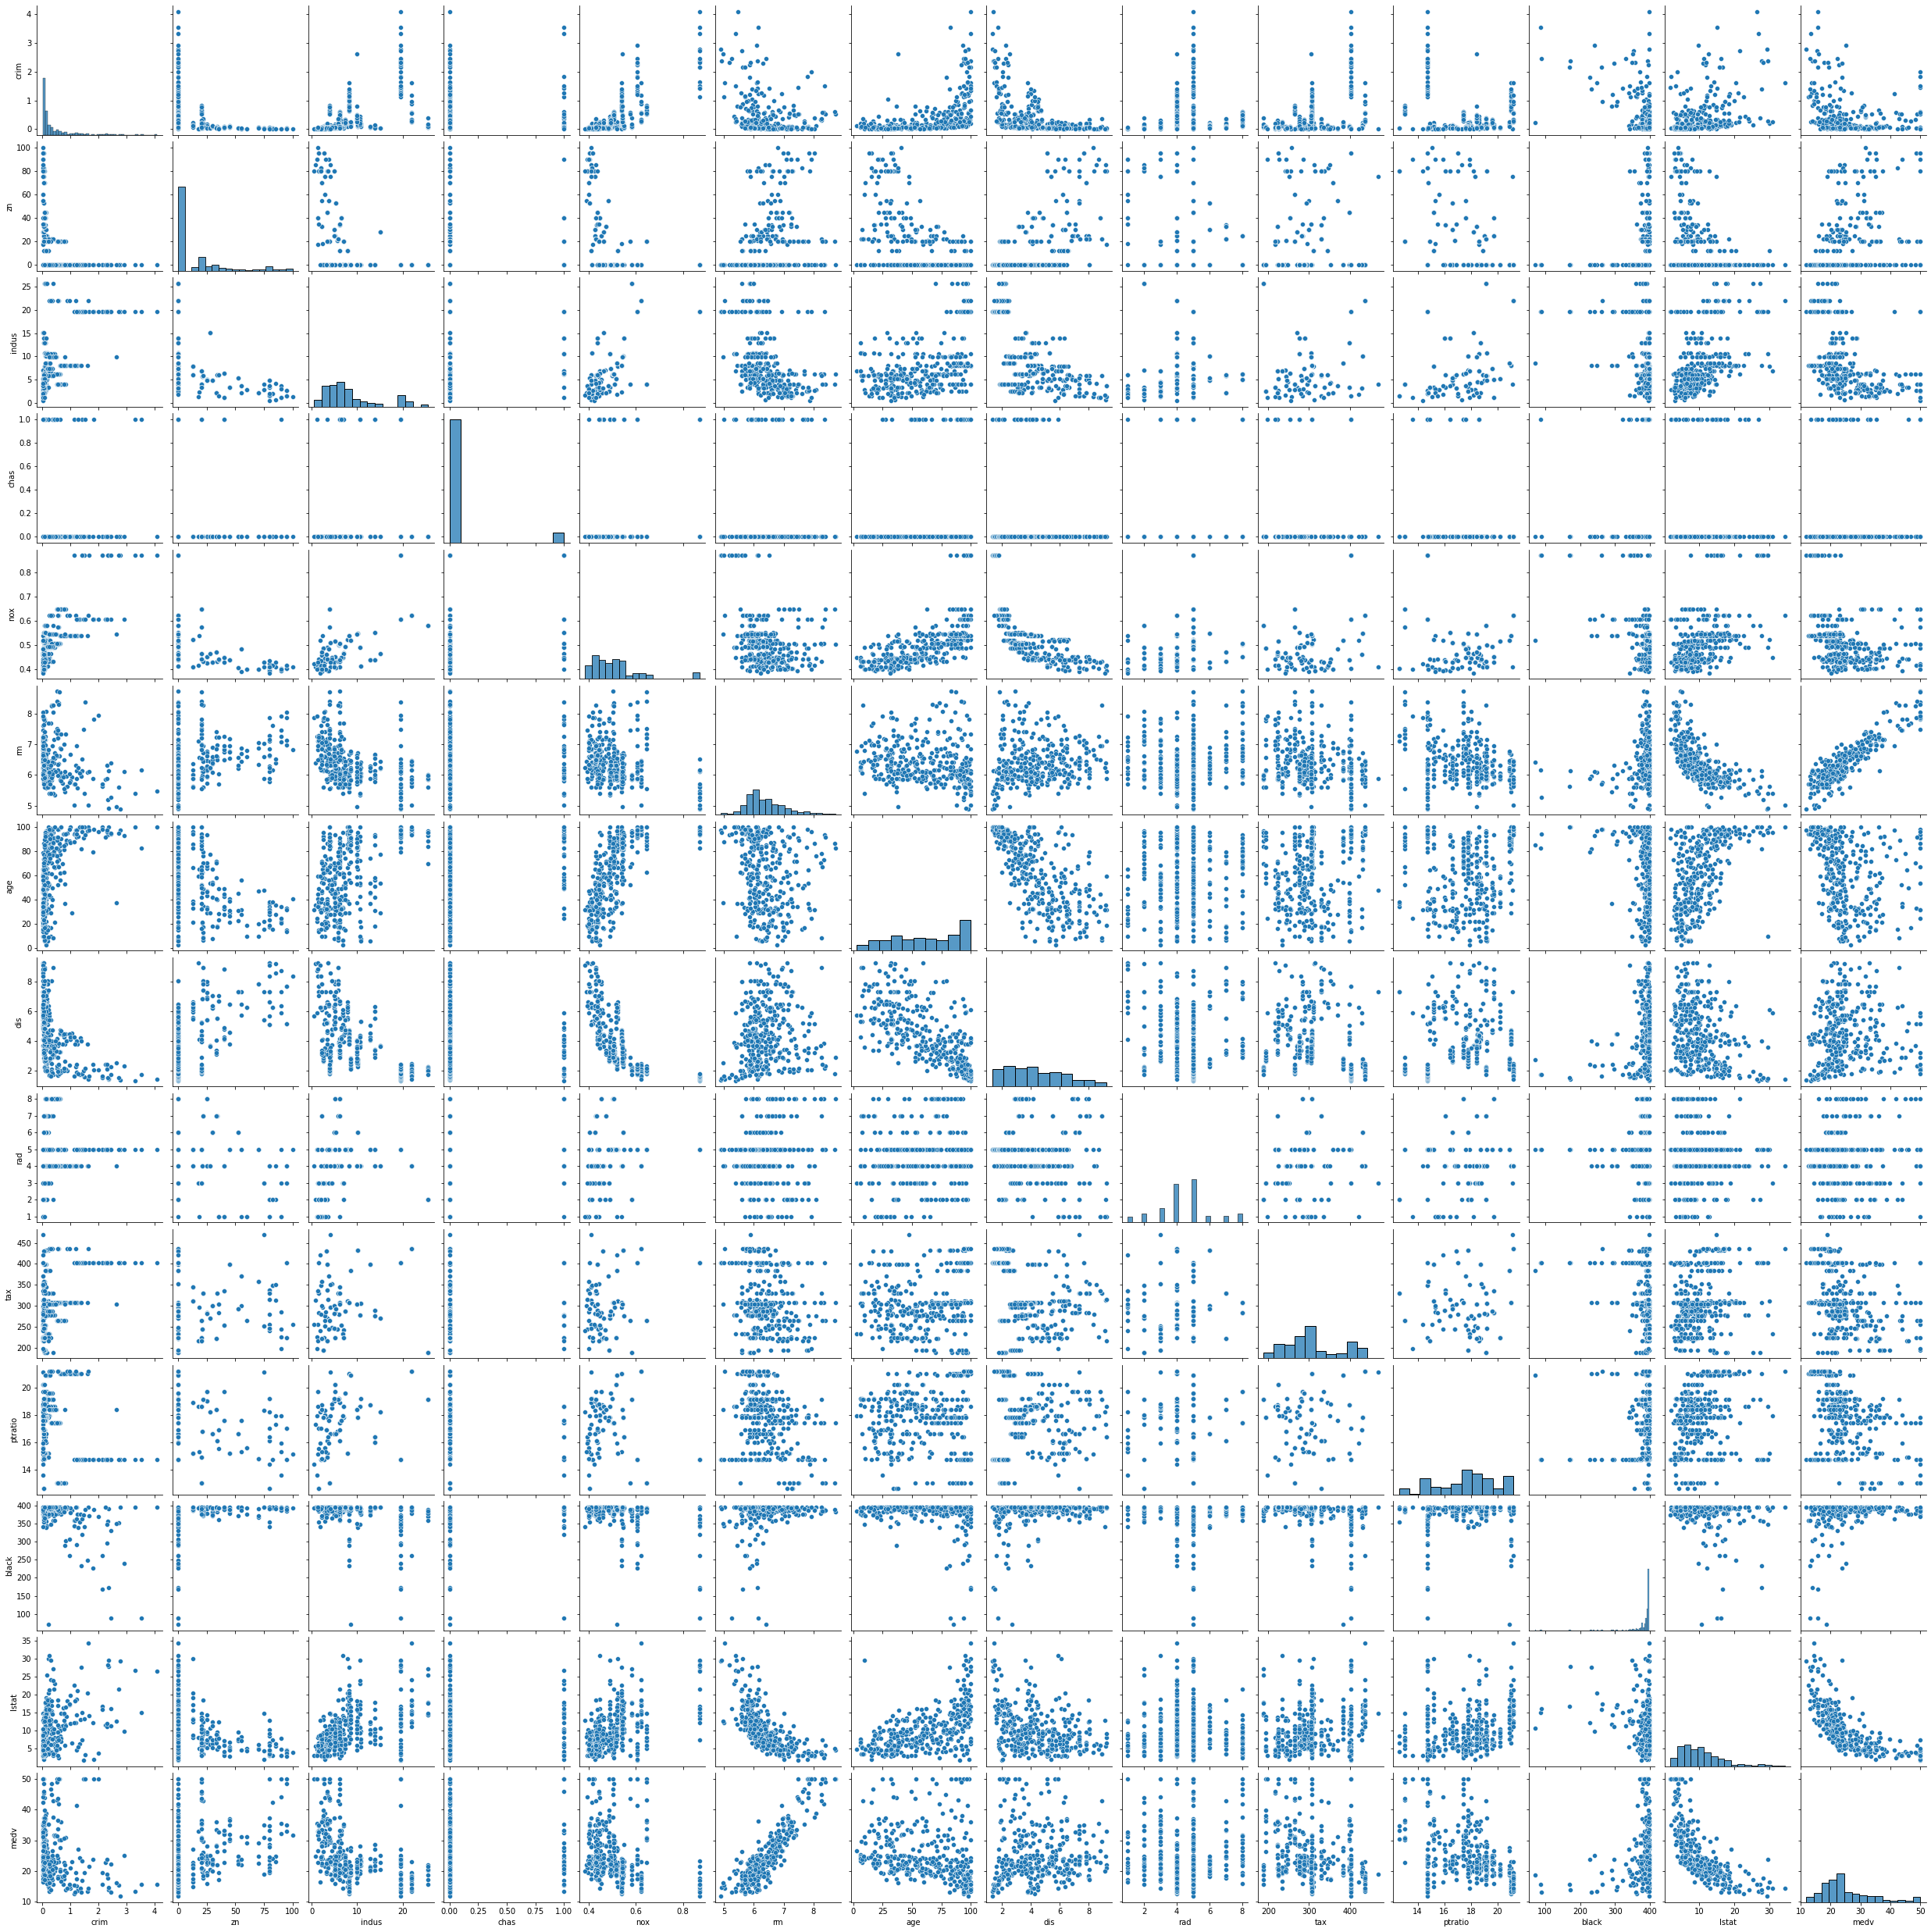

In [9]:
sb.pairplot(df_train)

# Linear Regression

In [10]:
x_train = np.array(df_train['rm']).reshape(-1,1)
x_test = np.array(df_test['rm']).reshape(-1,1)

In [11]:
y_train = df_train["medv"]
y_test = df_test["medv"]

In [12]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
reg.fit(x_train,y_train)

LinearRegression()

In [14]:
y_pred = reg.predict(x_test)

In [15]:
reg.coef_

array([7.56124077])

In [16]:
reg.intercept_

25.062678062678074

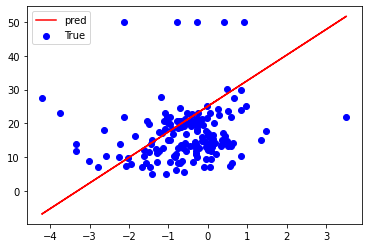

In [17]:
plt.scatter(x_test, y_test, label = "True", c= "b")
plt.plot(x_test, y_pred, label = "pred", c= "r")
plt.legend()
plt.show()

**Observation:**

- In first step we assaigning x_train and x_test from the column 'rm'.
- Since it's a one diamentional array, we reshape it to two diamentional array for noramlization.
- We Normalize using StandardScaler.
- After Training and Prediction,  the co-efficient and the y-intercept of the model with Visualization is represented.
- The Linear Regression model results in a linear graph.
- In most of the case, the accuracy of the Linear Regression will be lesser than Multiple Linear Regression.

## Score Count

In [18]:
r2_score(y_test, y_pred)

-0.8293898494555754

In [19]:
mean_squared_error(y_test, y_pred)

121.81585598386091

In [20]:
np.sqrt(mean_squared_error(y_test, y_pred))

11.037022061401387

# Polynomial Regression

In [21]:
poly = PolynomialFeatures(6)

In [22]:
x_train, x_test = np.array(df_train["lstat"]).reshape(-1,1), np.array(df_test["lstat"]).reshape(-1,1)

In [23]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [24]:
px_train = poly.fit_transform(x_train)
px_test = poly.fit_transform(x_test)

In [25]:
reg.fit(px_train,y_train)

LinearRegression()

In [26]:
y_pred = reg.predict(px_test)

In [27]:
reg.coef_

array([    0.        ,  -238.07610735,   794.05358751, -1261.78608555,
         687.46277955,   266.85492033,  -283.46312936])

In [28]:
reg.intercept_

49.20629459909631

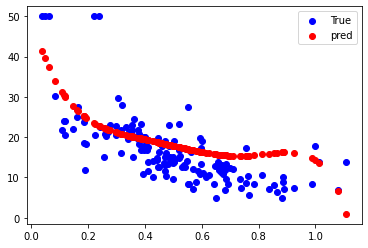

In [29]:
plt.scatter(x_test, y_test, label = "True", c= "b")
plt.scatter(x_test, y_pred, label = "pred", c= "r")
plt.legend()
plt.show()

**Observation:**

- In first step we assaigning the polynomial value to 6
- And secondly, we assaign x_train and x_test from the column 'lstat'.
- Since it's a one diamentional array, we reshape it to two diamentional array for noramlization.
- We Normalize using MinMaxScaler.
- After Training and Prediction,  the co-efficient and the y-intercept of the model with Visualization is represented.
- The Polynomial Regression model results in a polynomial graph.

## Score Count

In [30]:
r2_score(y_test, y_pred)

0.43761570106817727

In [31]:
mean_squared_error(y_test, y_pred)

37.44818240171783

In [32]:
np.sqrt(mean_squared_error(y_test, y_pred))

6.119492005200908

# Multiple Linear Regression

In [33]:
x_train = df_train.drop("medv", axis = 1)
x_test =  df_test.drop("medv", axis = 1)

In [34]:
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [35]:
reg.fit(x_train,y_train)

LinearRegression()

In [36]:
y_pred = reg.predict(x_test)

In [37]:
reg.coef_

array([ 5.36901157,  1.36389396,  0.95274062,  0.76709931, -4.86028411,
       35.39697325, -4.59435979, -7.92833686,  0.97520995, -4.15634869,
       -5.54038448,  5.1586643 , -2.86149577])

In [38]:
reg.intercept_

17.658576614910395

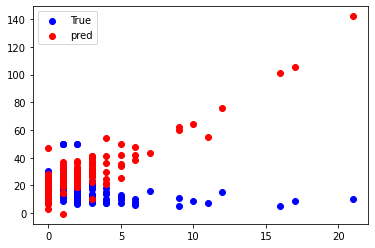

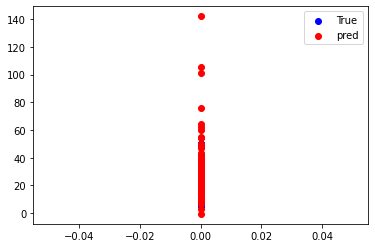

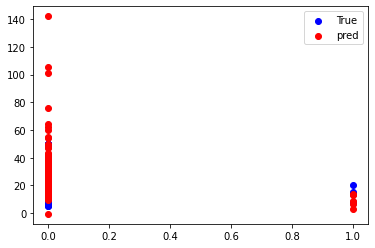

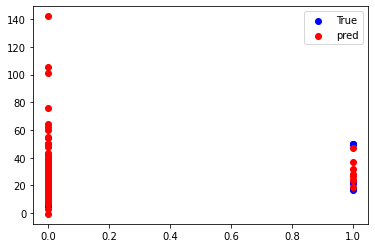

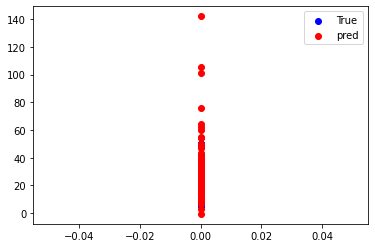

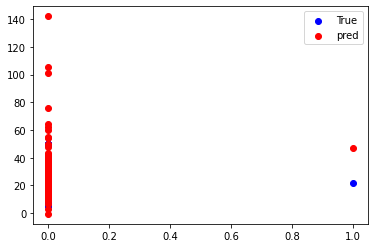

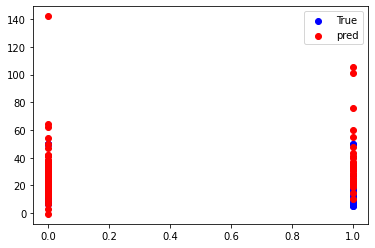

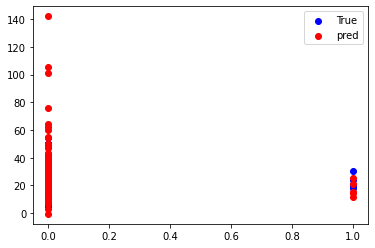

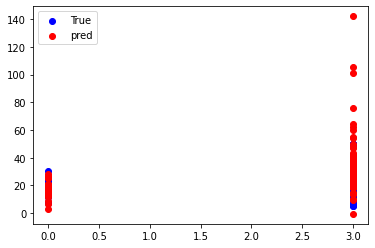

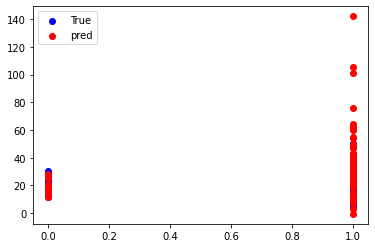

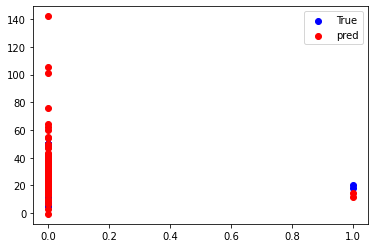

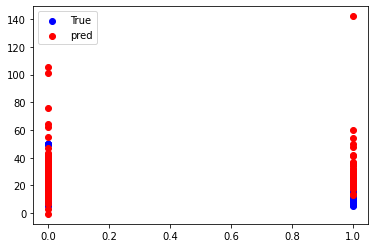

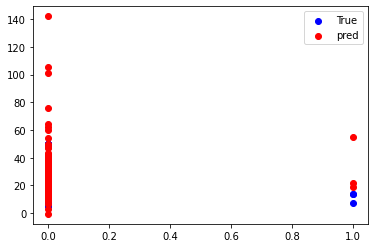

In [39]:
for i in range(len(x_test[0])):
    test_arr = np.array(range(len(x_test)))
    for j in range(len(x_test)):
        test_arr[j] = x_test[j][i]
    
    plt.scatter(test_arr, y_test, label = "True", c= "b")
    plt.scatter(test_arr, y_pred, label = "pred", c= "r")
    plt.legend()
    plt.show()


**Observation:**

- In first step we assaigning x_train and x_test the whole column input data.
- We Normalize it using MinMaxScaler.
- After Training and Prediction,  the co-efficient and the y-intercept of the model with Visualization is represented.
- We have plotted the graph of the model in every diamension of the model.
- The Multiple Linear Regression model results in a linear graph in a multi diamension.

## Score Count

In [40]:
r2_score(y_test, y_pred)

-7.222872760777237

In [41]:
mean_squared_error(y_test, y_pred)

547.5466502115722

In [42]:
np.sqrt(mean_squared_error(y_test, y_pred))

23.39971474637185

## Conclusion: Polynomial Regression Performs the best with this given dataset.

# The End